In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

alphabet = 'abcdefghijklmnopqrstuvwxyz'
letter_pos_count = []

for letter in alphabet:
    for i in range(0, 5):
        letter_pos_count.append([letter, i, 0, 0])

In [15]:
with open('word_bank.txt') as f:
    lines = f.readlines()

all_words = []

for word in lines:
    all_words.append(word.strip('\n'))

all_five_letter_words = []

for word in all_words:
    if (len(word) == 5):
        all_five_letter_words.append(word)

five_letter_words_no_dup_letters = []
for word in all_five_letter_words:
    duplicate_found = False
    for i in range(0, 4):
        if (word[(i + 1):].count(word[i]) > 0):
            duplicate_found = True
    if duplicate_found == False:
        five_letter_words_no_dup_letters.append(word)

# print(five_letter_words_no_dup_letters)

In [16]:
for word in five_letter_words_no_dup_letters:
    for i in range(0, 5):
        for l in letter_pos_count:
            if (l[0] == word[i] and l[1] == i):
                l[2] += 1

letter_pos_df = pd.DataFrame(letter_pos_count, columns = ['Letter', 'Index of Occurrence', 'Count', 'Normalized Count'])

# Normalize "Count" column to create "Normalized Count" in df
letter_pos_df['Normalized Count'] = (letter_pos_df['Count'] - letter_pos_df['Count'].min()) / (letter_pos_df['Count'].max() - letter_pos_df['Count'].min())
letter_pos_df.head()

,Letter,Index of Occurrence,Count,Normalized Count
0,a,0,611,0.302775
1,a,1,1782,0.883053
2,a,2,984,0.487611
3,a,3,952,0.471754
4,a,4,573,0.283944


In [17]:
words_scores = []

for word in five_letter_words_no_dup_letters:
    score_raw = 0
    score_normalized = 0
    for i in range(0, 5):
        for index, row in letter_pos_df.iterrows():
            if (row['Letter'] == word[i] and row['Index of Occurrence'] == i):
                score_raw += row['Count']
                score_normalized += row['Normalized Count']
    words_scores.append([word, score_raw, score_normalized])

words_scores_df = pd.DataFrame(words_scores, columns = ['Word', 'Score', 'Normalized Score'])

In [18]:
max_word_raw = ''
max_pts_raw = 0
max_word_norm = ''
max_pts_norm = 0
for index, row in words_scores_df.iterrows():
    if (row['Score'] > max_pts_raw):
        max_word_raw = row['Word']
        max_pts_raw = row['Score']
    if (row['Normalized Score'] > max_pts_norm):
        max_word_norm = row['Word']
        max_pts_norm = row['Normalized Score']

print('max_word_raw = ' + max_word_raw)
print('max_pts_raw = ' + str(max_pts_raw))
print('max_word_norm = ' + max_word_norm)
print('max_pts_norm = ' + str(max_pts_norm))

max_word_raw = cares
max_pts_raw = 7379
max_word_norm = cares
max_pts_norm = 3.6565906838453914


In [19]:
no_dup_letter_word_count = len(five_letter_words_no_dup_letters)
print(no_dup_letter_word_count)

all_five_letter_word_count = len(all_five_letter_words)
print(all_five_letter_word_count)

10173
15918


In [20]:
index0_top5 = letter_pos_df[letter_pos_df['Index of Occurrence'] == 0]
index0_top5 = index0_top5.sort_values(by = ['Normalized Count'], ascending = False).head(5)
index0_top5['Proportion (All)'] = index0_top5['Count'] / all_five_letter_word_count
index0_top5['Proportion (No Duplicates)'] = index0_top5['Count'] / no_dup_letter_word_count
index0_top5

,Letter,Index of Occurrence,Count,Normalized Count,Proportion (All),Proportion (No Duplicates)
90,s,0,1093,0.541625,0.068664,0.107441
10,c,0,818,0.405352,0.051388,0.080409
5,b,0,737,0.365213,0.046300,0.072447
75,p,0,642,0.318137,0.040332,0.063108
0,a,0,611,0.302775,0.038384,0.060061


In [21]:
index1_top5 = letter_pos_df[letter_pos_df['Index of Occurrence'] == 1]
index1_top5 = index1_top5.sort_values(by = ['Normalized Count'], ascending = False).head(5)
index1_top5['Proportion (All)'] = index1_top5['Count'] / all_five_letter_word_count
index1_top5['Proportion (No Duplicates)'] = index1_top5['Count'] / no_dup_letter_word_count
index1_top5

,Letter,Index of Occurrence,Count,Normalized Count,Proportion (All),Proportion (No Duplicates)
1,a,1,1782,0.883053,0.111949,0.175170
71,o,1,1495,0.740833,0.093919,0.146958
21,e,1,1086,0.538157,0.068225,0.106753
41,i,1,1085,0.537661,0.068162,0.106655
101,u,1,961,0.476214,0.060372,0.094466


In [22]:
index2_top5 = letter_pos_df[letter_pos_df['Index of Occurrence'] == 2]
index2_top5 = index2_top5.sort_values(by = ['Normalized Count'], ascending = False).head(5)
index2_top5['Proportion (All)'] = index2_top5['Count'] / all_five_letter_word_count
index2_top5['Proportion (No Duplicates)'] = index2_top5['Count'] / no_dup_letter_word_count
index2_top5

,Letter,Index of Occurrence,Count,Normalized Count,Proportion (All),Proportion (No Duplicates)
87,r,2,1115,0.552527,0.070046,0.109604
2,a,2,984,0.487611,0.061817,0.096727
42,i,2,956,0.473736,0.060058,0.093974
67,n,2,825,0.408821,0.051828,0.081097
72,o,2,663,0.328543,0.041651,0.065173


In [23]:
index3_top5 = letter_pos_df[letter_pos_df['Index of Occurrence'] == 3]
index3_top5 = index3_top5.sort_values(by = ['Normalized Count'], ascending = False).head(5)
index3_top5['Proportion (All)'] = index3_top5['Count'] / all_five_letter_word_count
index3_top5['Proportion (No Duplicates)'] = index3_top5['Count'] / no_dup_letter_word_count
index3_top5

,Letter,Index of Occurrence,Count,Normalized Count,Proportion (All),Proportion (No Duplicates)
23,e,3,1646,0.815659,0.103405,0.161801
43,i,3,965,0.478196,0.060623,0.094859
3,a,3,952,0.471754,0.059807,0.093581
68,n,3,650,0.322101,0.040834,0.063895
98,t,3,622,0.308226,0.039075,0.061142


In [24]:
index4_top5 = letter_pos_df[letter_pos_df['Index of Occurrence'] == 4]
index4_top5 = index4_top5.sort_values(by = ['Normalized Count'], ascending = False).head(5)
index4_top5['Proportion (All)'] = index4_top5['Count'] / all_five_letter_word_count
index4_top5['Proportion (No Duplicates)'] = index4_top5['Count'] / no_dup_letter_word_count
index4_top5

,Letter,Index of Occurrence,Count,Normalized Count,Proportion (All),Proportion (No Duplicates)
94,s,4,2018,1.000000,0.126775,0.198368
24,e,4,1172,0.580773,0.073627,0.115207
124,y,4,1047,0.518831,0.065775,0.102919
99,t,4,797,0.394945,0.050069,0.078345
69,n,4,616,0.305253,0.038698,0.060552


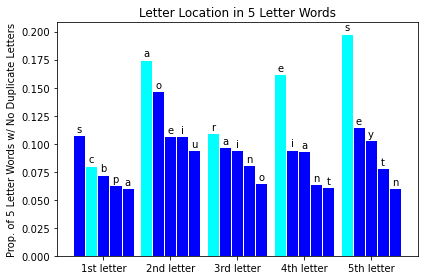

In [25]:
labels = ['1st letter', '2nd letter', '3rd letter', '4th letter', '5th letter']
first = [0.107441, 0.175170, 0.109604, 0.161801, 0.198368]
first_labels = ['s', 'a', 'r', 'e', 's']
second = [0.080409, 0.146958, 0.096727, 0.094859, 0.115207]
second_labels = ['c', 'o', 'a', 'i', 'e']
third = [0.072447, 0.106753, 0.093974, 0.093581, 0.102919]
third_labels = ['b', 'e', 'i', 'a', 'y']
fourth = [0.063108, 0.106655, 0.081097, 0.063895, 0.078345] 
fourth_labels = ['p', 'i', 'n', 'n', 't']
fifth = [0.060061, 0.094466, 0.065173, 0.061142, 0.060552]
fifth_labels = ['a', 'u', 'o', 't', 'n']

x = np.arange(len(labels))  # the label locations
width = 0.18 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2 * width, first, width, color = ['blue', 'cyan', 'cyan', 'cyan', 'cyan'], edgecolor = 'white')
rects2 = ax.bar(x - width, second, width, color = ['cyan', 'blue', 'blue', 'blue', 'blue'], edgecolor = 'white')
rects3 = ax.bar(x, third, width, color = ['blue', 'blue', 'blue', 'blue', 'blue'], edgecolor = 'white')
rects4 = ax.bar(x + width, fourth, width, color = ['blue', 'blue', 'blue', 'blue', 'blue'], edgecolor = 'white')
rects5 = ax.bar(x + 2 * width, fifth, width, color = ['blue', 'blue', 'blue', 'blue', 'blue'], edgecolor = 'white')


ax.set_ylabel('Prop. of 5 Letter Words w/ No Duplicate Letters')
ax.set_title('Letter Location in 5 Letter Words')
ax.set_xticks(x, labels)

ax.bar_label(rects1, labels = first_labels, padding = 1)
ax.bar_label(rects2, labels = second_labels, padding = 1)
ax.bar_label(rects3, labels = third_labels, padding = 1)
ax.bar_label(rects4, labels = fourth_labels, padding = 1)
ax.bar_label(rects5, labels = fifth_labels, padding = 1)

fig.tight_layout()

plt.show()